In [1]:
from google.colab import files

uploaded= files.upload()

ModuleNotFoundError: No module named 'google.colab'

# Exploratory Data Analysis and Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Checking the first few rows and columns

df= pd.read_excel('Hotel_Reviews.xlsx')
df.head()

,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos
3,"unique, great stay, wonderful time hotel monac...",Pos
4,"great stay great stay, went seahawk game aweso...",Pos


In [19]:
# Checking the size of the data

df.shape

(20491, 2)

In [20]:
# Checking data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    20491 non-null  object
 1   Feedback  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [21]:
# Checking for missing values

df[df.duplicated()].shape

(0, 2)

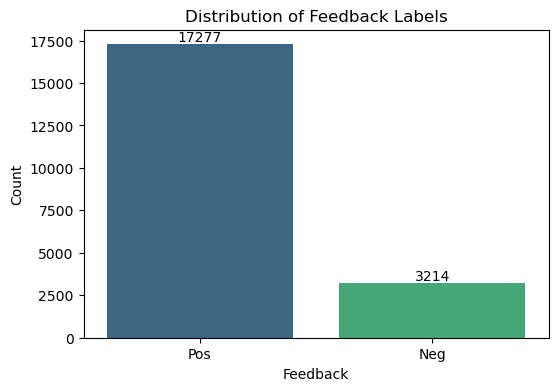

In [22]:
# Checking the unique value counts of feedback labels

feedback_distribution = df['Feedback'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=feedback_distribution.index, y=feedback_distribution.values, palette='viridis')

for index, value in enumerate(feedback_distribution.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Feedback Labels')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [23]:
# Normalization

df["Review"]= df["Review"].str.lower()
df.head()

,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos
3,"unique, great stay, wonderful time hotel monac...",Pos
4,"great stay great stay, went seahawk game aweso...",Pos


In [24]:
# Removing punctuations

import string

df["Review"]= df["Review"].str.translate(str.maketrans('','', string.punctuation))
df.head()


,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4 experience hotel monaco seatt...,Pos
3,unique great stay wonderful time hotel monaco ...,Pos
4,great stay great stay went seahawk game awesom...,Pos


In [25]:
# Lemmatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()

df["Review"]= df["Review"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dipak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice room not 4 experience hotel monaco seattl...,Pos
3,unique great stay wonderful time hotel monaco ...,Pos
4,great stay great stay went seahawk game awesom...,Pos


In [26]:
# Removing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the existing stopwords
stop = stopwords.words('english')

# Add additional words to the stopwords list
additional_stopwords = {'hotel'}
stop.extend(additional_stopwords)

# Apply the modified stopwords list to remove these words from the reviews
df["Review"] = df["Review"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dipak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Feedback
0,nice expensive parking got good deal stay anni...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice room 4 experience monaco seattle good nt ...,Pos
3,unique great stay wonderful time monaco locati...,Pos
4,great stay great stay went seahawk game awesom...,Pos


In [27]:
# Most frequently occuring and least occuring words

from collections import Counter

# Concatenate all reviews into a single string
all_reviews = ' '.join(df['Review'])

# Split the concatenated string into words
words = all_reviews.split()

# Count word frequencies
word_freq = Counter(words)

# Number of top and least frequent words to display
N = 10

# Get the most common words
most_common_words = word_freq.most_common(N)
# Get the least common words
least_common_words = word_freq.most_common()[:-N-1:-1]

# Display results
print(f"Top {N} most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

print(f"\nTop {N} least common words:")
for word, freq in least_common_words:
    print(f"{word}: {freq}")

Top 10 most common words:
room: 46315
great: 21088
nt: 18993
good: 17036
staff: 16266
stay: 15334
night: 13740
day: 12726
time: 12589
nice: 12399

Top 10 least common words:
swears: 1
pocketthere: 1
cornerone: 1
tallers: 1
victimizedthis: 1
joball: 1
barcelonins: 1
undercover: 1
desquadra: 1
mossos: 1


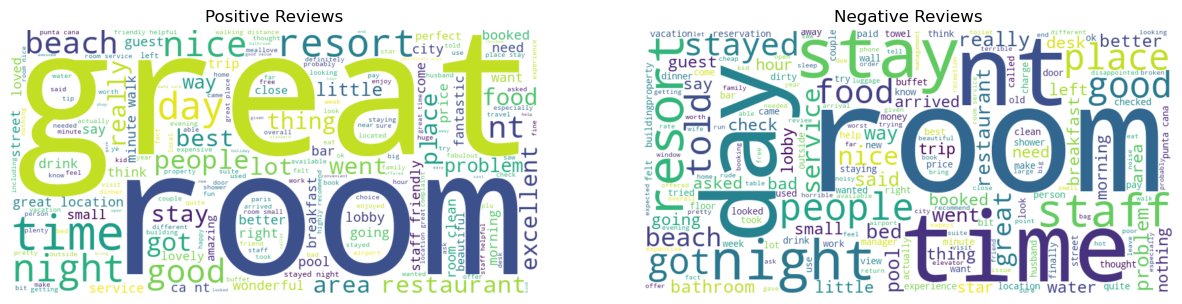

In [28]:
# Word cloud

from wordcloud import WordCloud

# Concatenate reviews by sentiment
positive_reviews = ' '.join(df[df['Feedback'] == 'Pos']['Review'])
negative_reviews = ' '.join(df[df['Feedback'] == 'Neg']['Review'])

# Create word clouds
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

In [29]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


0        0.208744
1        0.235193
2        0.294420
3        0.504825
4        0.469643
           ...   
20486    0.218320
20487    0.503704
20488    0.171220
20489    0.144686
20490    0.110615
Name: Sentiment_Score, Length: 20491, dtype: float64


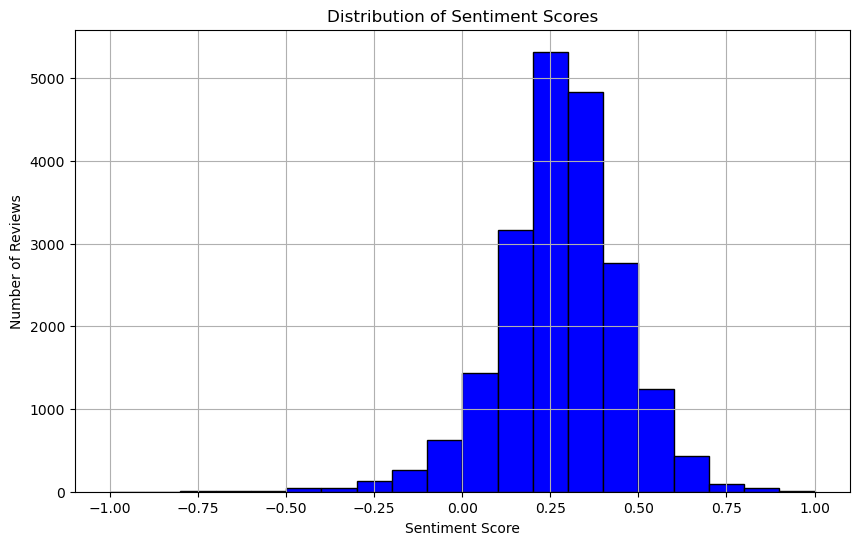

In [30]:
# Visualization of sentiment scores

from textblob import TextBlob

# Function to calculate sentiment score
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each review
df['Sentiment_Score'] = df['Review'].apply(calculate_sentiment)

# Display the DataFrame with Sentiment Scores
print(df["Sentiment_Score"])

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment_Score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

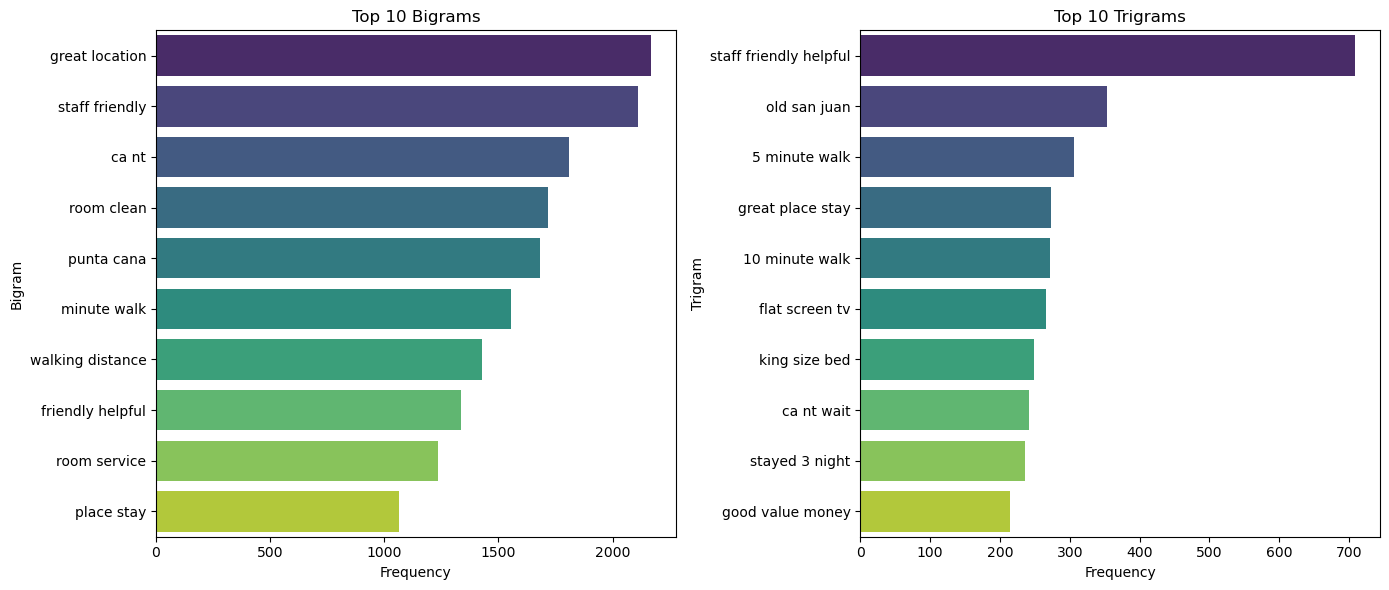

In [31]:
# Bar graph of Bigrams and Trigrams

from nltk.util import ngrams
from collections import Counter


# Extract tokens from preprocessed reviews
tokens = [word for review in df["Review"] for word in review.split()]

# Generate bigrams and trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Count frequencies of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the most common bigrams and trigrams
most_common_bigrams = bigram_freq.most_common(10)
most_common_trigrams = trigram_freq.most_common(10)

# Convert to DataFrame for easy plotting
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])
trigram_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Frequency'])

# Convert tuples to readable strings
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))

# Plot most common bigrams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
plt.title('Top 10 Bigrams')

# Plot most common trigrams
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='viridis')
plt.title('Top 10 Trigrams')

plt.tight_layout()
plt.show()

In [32]:
# Term document matrix (TDM) using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 5000)

x = cv.fit_transform(df["Review"]).toarray()
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
# Extracting feature names

print(cv.get_feature_names_out())

['05' '06' '07' ... 'zone' 'zoo' 'äcor']


In [34]:
x = pd.DataFrame(x)
x.columns = list(cv.get_feature_names_out())
x.head()

,05,06,07,08,10,100,1000,10000,1015,1030,...,youçéêl,yr,yuck,yum,yummy,yunque,zero,zone,zoo,äcor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x.shape

(20491, 5000)

In [36]:
# Assigning target variable

y= df["Feedback"]
y.head()

0    Pos
1    Neg
2    Pos
3    Pos
4    Pos
Name: Feedback, dtype: object

In [37]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

y= LE.fit_transform(y)
y= pd.DataFrame(y)
y.columns= ["Feedback"]
y.head()

,Feedback
0,1
1,0
2,1
3,1
4,1


# **Model fitting**

In [38]:
# Logistic Regression with cross-validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
dt_model= DecisionTreeClassifier()

dt_model.fit(x_train,y_train)
y_pred_train= dt_model.predict(x_train)
y_pred_test= dt_model.predict(x_test)
print("Accuracy score of train:", accuracy_score(y_train,y_pred_train).round(2))
print("Accuracy score of test:", accuracy_score(y_test,y_pred_test.round(2)))

AttributeError: 'float' object has no attribute 'round'

In [ ]:
df

In [ ]:
x

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `x` and `y` are defined as features and target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize Linear Regression model
linreg_model = LinearRegression()

# Fit the model
linreg_model.fit(x_train, y_train)

# Predict on train and test sets
y_pred_train = linreg_model.predict(x_train)
y_pred_test = linreg_model.predict(x_test)

# Calculate accuracy metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error of train:", mse_train)
print("Mean Squared Error of test:", mse_test)
print("R^2 Score of train:", r2_train)
print("R^2 Score of test:", r2_test)


NameError: name 'x' is not defined

# **Model** **Building**

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Model Accuracy: 0.9311971372804164
Logistic Regression Model ROC-AUC Score: 0.9559767830839541


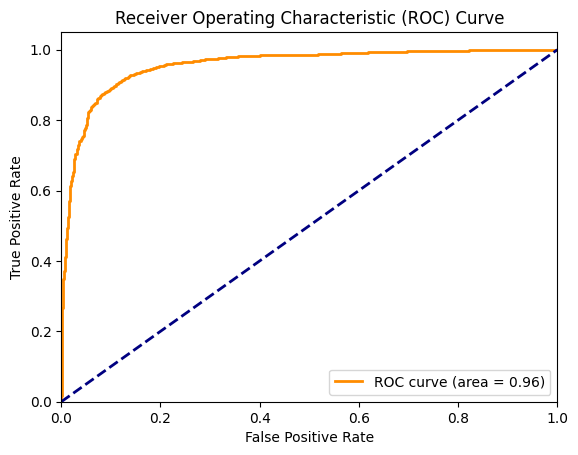

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
df_csv = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df_csv["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df_csv["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 penalties
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model
logreg_model = LogisticRegression(**best_params)
logreg_model.fit(x_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(x_test)
y_prob = logreg_model.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic Regression Model Accuracy:", accuracy)
print("Logistic Regression Model ROC-AUC Score:", roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Plot ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

SVM Model Accuracy: 0.9292768397578847
Classification Report:
               precision    recall  f1-score   support

         Neg       0.85      0.66      0.74       975
         Pos       0.94      0.98      0.96      5303

    accuracy                           0.93      6278
   macro avg       0.90      0.82      0.85      6278
weighted avg       0.93      0.93      0.93      6278



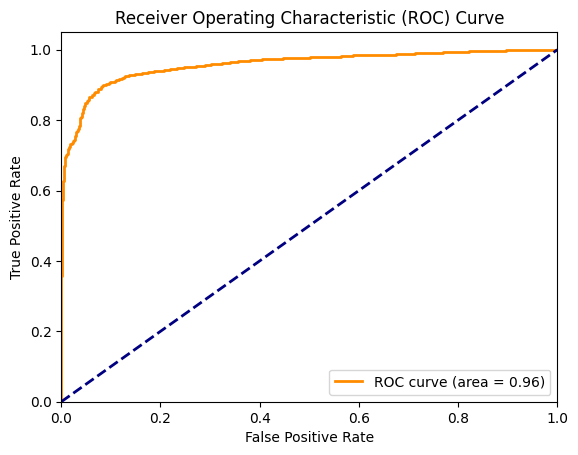

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
df_csv = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')
df_xlsx = pd.read_excel('/content/Hotel_Reviews.xlsx')

# Combine the two dataframes (assuming they are the same, just loaded from different formats)
df = pd.concat([df_csv, df_xlsx]).drop_duplicates().reset_index(drop=True)

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=LE.classes_)

print("SVM Model Accuracy:", accuracy)
print("Classification Report:\n", report)
# Plot ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Random Forest Model Accuracy: 0.8944372153545869
Random Forest Model ROC-AUC Score: 0.9375017517540224


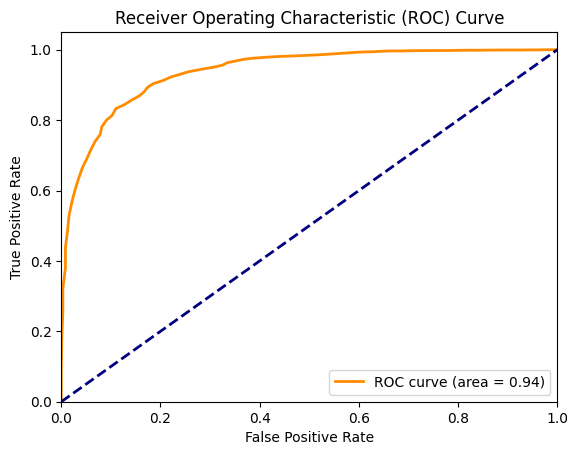

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
csv_file_path = '/content/Hotel_Reviews.csv'
df = pd.read_csv(csv_file_path, encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("Random Forest Model Accuracy:", accuracy)
print("Random Forest Model ROC-AUC Score:", roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Plot ROC-AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


KNN Model Accuracy: 0.8619063109954457
KNN Model ROC-AUC: 0.7912625029868036


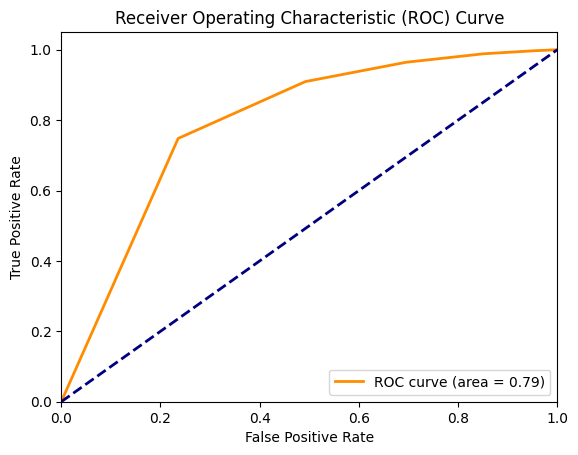

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the data
df_csv = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df_csv["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df_csv["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)

# Binarize the output for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = knn_model.predict_proba(x_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob)
print("KNN Model ROC-AUC:", roc_auc)

# Plot ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Naive Bayes Model Accuracy: 0.9185100845803513
Classification Report:
               precision    recall  f1-score   support

         Neg       0.70      0.82      0.76       955
         Pos       0.97      0.94      0.95      5193

    accuracy                           0.92      6148
   macro avg       0.83      0.88      0.85      6148
weighted avg       0.93      0.92      0.92      6148

ROC-AUC Score: 0.9555069601346153


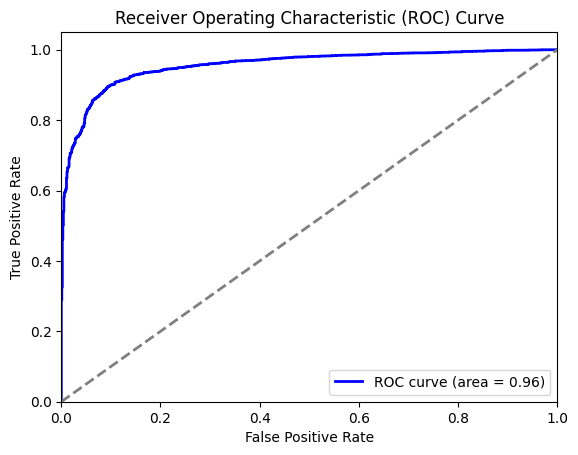

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(x_test)
y_pred_proba = nb_model.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=LE.classes_)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Naive Bayes Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:02:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

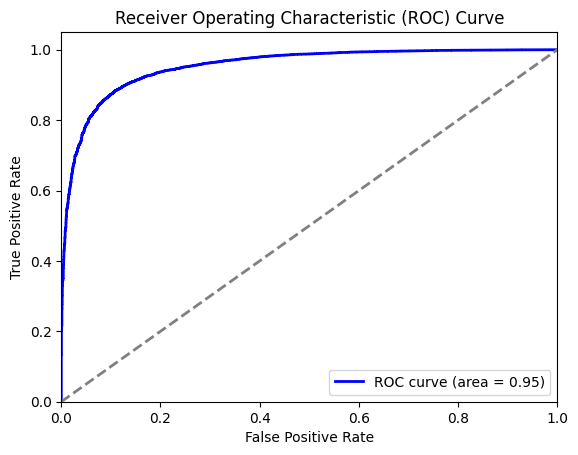

XGBoost Accuracy: 0.9212825063809325
ROC-AUC Score: 0.953030427127598


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb

# Load the data
df = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform cross-validation and calculate accuracies
xgb_scores = cross_val_score(xgb_model, x, y, cv=5, scoring='accuracy')
xgb_accuracy = xgb_scores.mean()

# Fit the model and predict probabilities
xgb_model.fit(x_train, y_train)
y_pred_prob = cross_val_predict(xgb_model, x, y, cv=5, method='predict_proba')[:,1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("XGBoost Accuracy:", xgb_accuracy)
print("ROC-AUC Score:", roc_auc)


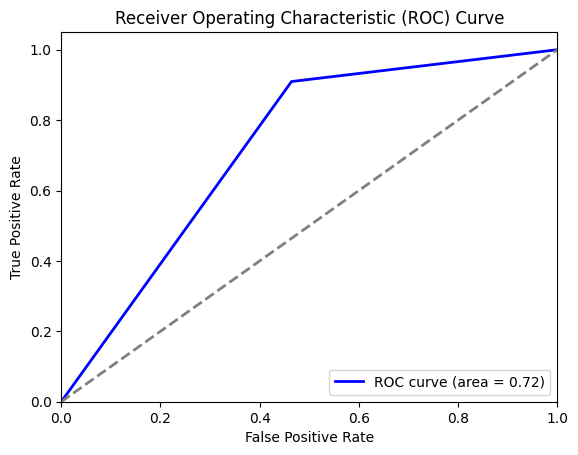

Decision Tree Accuracy: 0.8496418736324767
ROC-AUC Score: 0.722714812081873


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Perform cross-validation and calculate accuracies
dt_scores = cross_val_score(dt_model, x, y, cv=5, scoring='accuracy')
dt_accuracy = dt_scores.mean()

# Fit the model and predict probabilities
dt_model.fit(x_train, y_train)
y_pred_prob = cross_val_predict(dt_model, x, y, cv=5, method='predict_proba')[:,1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Decision Tree Accuracy:", dt_accuracy)
print("ROC-AUC Score:", roc_auc)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Load the data
df = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocess the data
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define models
models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models using cross-validation and track their performance
best_model_name = None
best_accuracy = 0

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    print(f'{name} Accuracy: {mean_accuracy:.4f}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model_name = name

# Display the best model
print(f'\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}')


# ***Model Selection:***


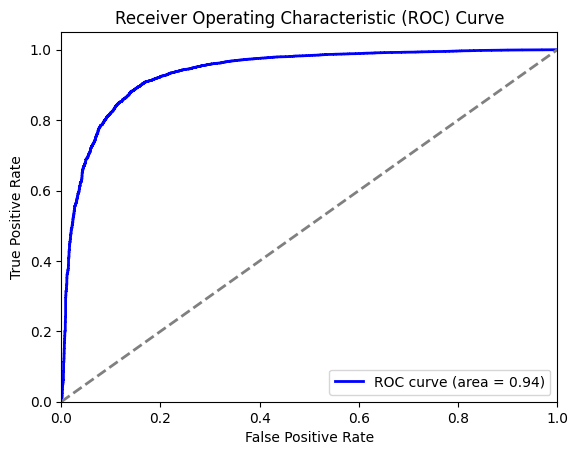

Logistic Regression Accuracy: 0.917378877182129
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       955
           1       0.95      0.96      0.96      5193

    accuracy                           0.92      6148
   macro avg       0.86      0.84      0.85      6148
weighted avg       0.92      0.92      0.92      6148

ROC-AUC Score: 0.9358070675269277


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Perform cross-validation and predict probabilities
y_pred_prob = cross_val_predict(logreg_model, x, y, cv=5, method='predict_proba')[:,1]

# Calculate cross-validated accuracy
logreg_accuracy = cross_val_score(logreg_model, x, y, cv=5, scoring='accuracy').mean()

# Fit the model on the training data
logreg_model.fit(x_train, y_train)
y_pred = logreg_model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Hotel_Reviews.csv', encoding='latin1')

# Preprocessing
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df["Review"]).toarray()

LE = LabelEncoder()
y = LE.fit_transform(df["Feedback"])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the SVM model
svm_model = SVC(probability=True)

# Perform cross-validation and calculate accuracies
svm_scores = cross_val_score(svm_model, x, y, cv=5, scoring='accuracy')
svm_accuracy = svm_scores.mean()

# Fit the model and predict probabilities
svm_model.fit(x_train, y_train)
y_pred_prob = cross_val_predict(svm_model, x, y, cv=5, method='predict_proba')[:,1]

# Generate classification report
y_pred = cross_val_predict(svm_model, x, y, cv=5)
print(classification_report(y, y_pred, target_names=LE.classes_))

# Calculate ROC-AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("SVM Accuracy:", svm_accuracy)
print("ROC-AUC Score:", roc_auc)


In [16]:
!pip install streamlit



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:

import streamlit as st
import joblib

# Load your model
model = joblib.load('model.pkl')

st.title('Hotel Rating Classification')

# Create input fields for your features
input_data = st.text_input('Review')

if st.button('Predict'):
    prediction = model.predict([input_data])
    st.write('Prediction:', prediction)


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [39]:
import streamlit as st
st.title('review')

2024-08-13 20:02:28.789 
  command:

    streamlit run C:\Users\dipak\OneDrive\Documents\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()